In [ ]:
import tensorflow as tf

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 15s 0us/step


In [ ]:
len(training_images)
len(testing_images)

10000

In [ ]:
training_labels[0]

array([6], dtype=uint8)

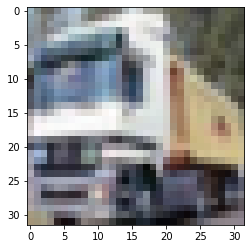

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])

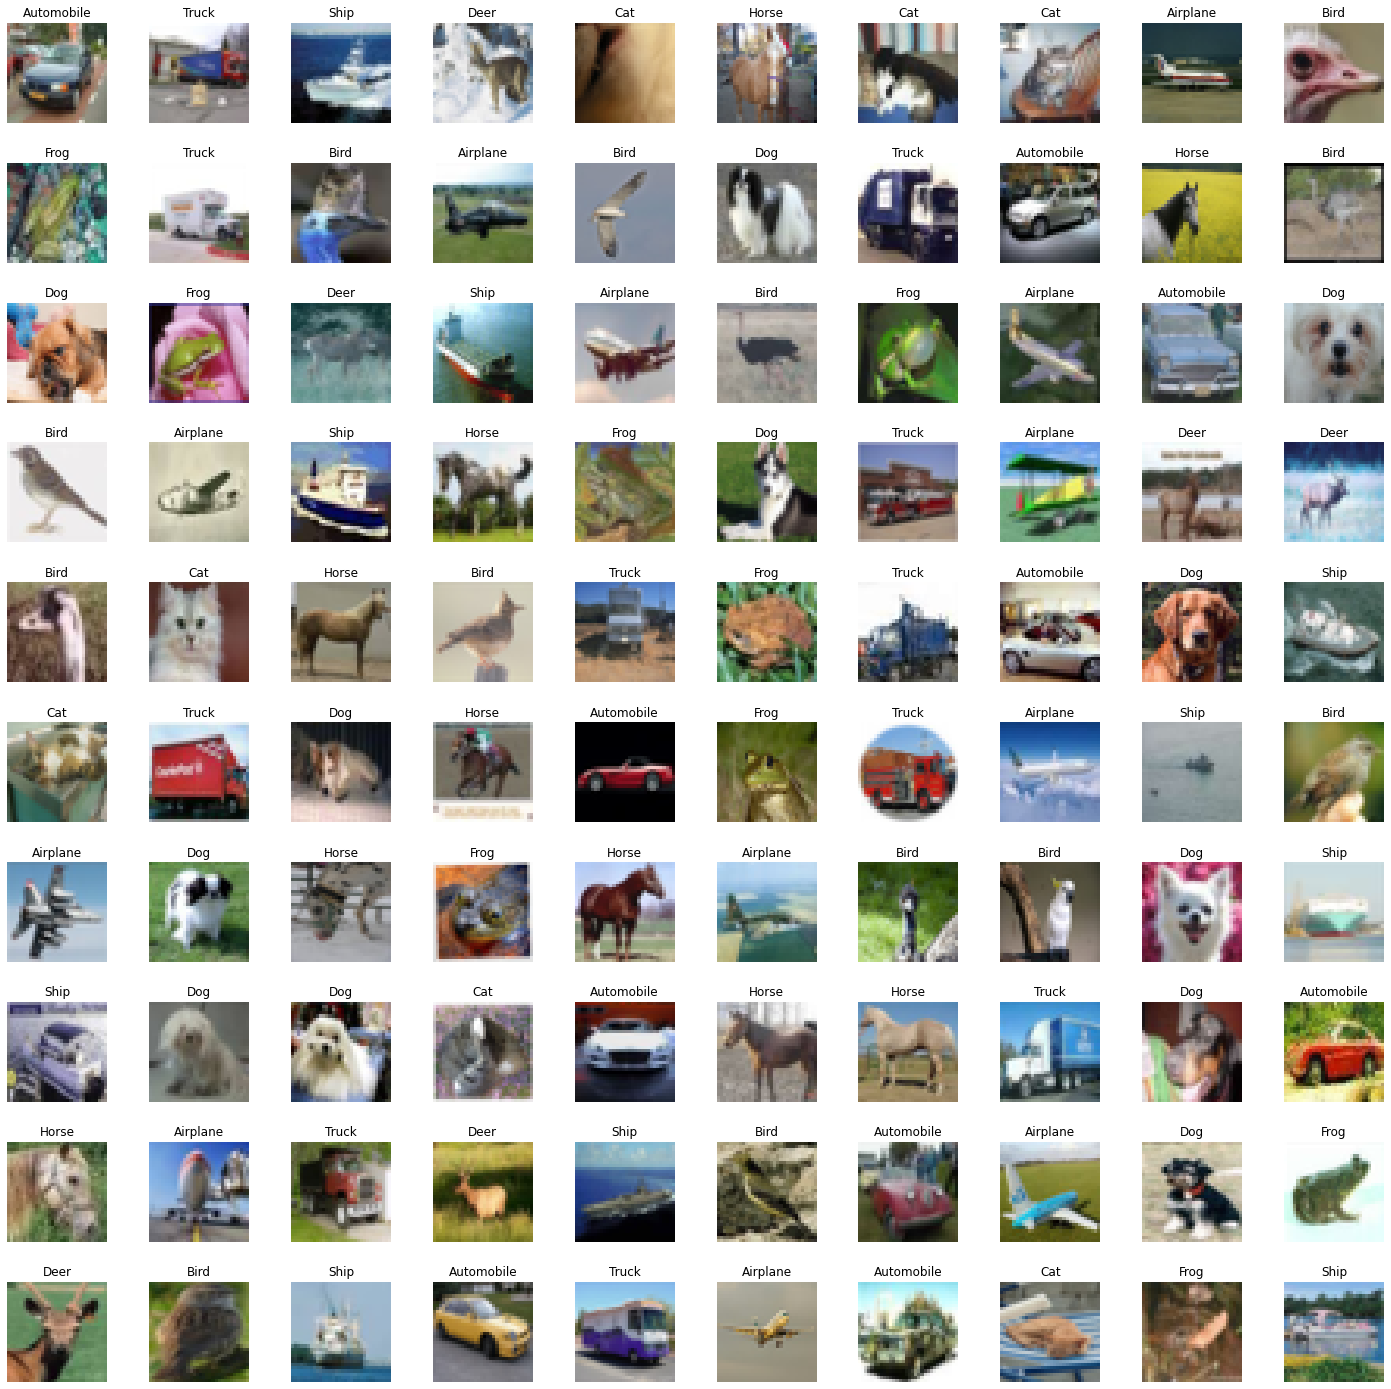

In [ ]:
import numpy as np
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(training_images)

for i in range(0,L_grid*W_grid):
    index = np.random.randint(0,n_training) # pick a random number
    axes[i].imshow(training_images[index])
    index = training_labels[index]
    axes[i].set_title(labels[int(index)])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
training_images[226].shape

(32, 32, 3)

In [ ]:
training_images = training_images.reshape(50000, 32, 32, 3)
training_images = training_images / 255

In [ ]:
testing_images = testing_images.reshape(10000, 32, 32, 3)
testing_images = testing_images / 255

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
              )

In [ ]:
model.fit(
    training_images,
    training_labels, 
    batch_size = 128,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
391/391 [==============================] - 7s 17ms/step - loss: 1.9561 - accuracy: 0.2841
Epoch 2/10
391/391 [==============================] - 7s 17ms/step - loss: 1.3467 - accuracy: 0.5250
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 1.0122 - accuracy: 0.6508
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.7781 - accuracy: 0.7327
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.6079 - accuracy: 0.7908
Epoch 6/10
391/391 [==============================] - 7s 17ms/step - loss: 0.4741 - accuracy: 0.8368
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3579 - accuracy: 0.8764
Epoch 8/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2931 - accuracy: 0.9032
Epoch 9/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2481 - accuracy: 0.9185
Epoch 10/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2176 - accura

In [ ]:
model.evaluate(testing_images, testing_labels, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 1.7212 - accuracy: 0.7561


[1.7212246656417847, 0.7560999989509583]

In [ ]:
prediction = model.predict(testing_images)
print(prediction[0])

[9.30832414e-07 3.97415612e-08 1.17822747e-08 9.99994755e-01
 1.19026275e-07 1.27142971e-06 1.69135603e-07 4.17248874e-12
 2.73403521e-06 6.83250656e-09]


In [ ]:
testing_labels[0]

array([3], dtype=uint8)